In [71]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [72]:
data = pd.read_csv("marine_life_dataset.csv")

In [73]:
data.head()

,Region,Species,Population,Species Category,Behavior,Habitat Preference,Trophic Level,Water Temperature (°C),Nutrient Levels
0,Western Reef,Fish,33,Invasive,Solitary,Shallow,Herbivore,25.334903,0.306537
1,Southern Reef,Crab,15,Invasive,Solitary,Deep,Carnivore,21.734394,0.421331
2,Eastern Reef,Jellyfish,8,Invasive,Schooling,Deep,Carnivore,25.429249,0.713816
3,Eastern Reef,Crab,78,Invasive,Schooling,Deep,Carnivore,27.366580,0.343183
4,Western Reef,Fish,61,Endemic,Schooling,Deep,Herbivore,23.642494,0.349990


In [74]:
data = data.rename(columns={"Water Temperature (°C)":"Water temp"})

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Region              1000 non-null   object 
 1   Species             1000 non-null   object 
 2   Population          1000 non-null   int64  
 3   Species Category    1000 non-null   object 
 4   Behavior            1000 non-null   object 
 5   Habitat Preference  1000 non-null   object 
 6   Trophic Level       1000 non-null   object 
 7   Water temp          1000 non-null   float64
 8   Nutrient Levels     1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


In [76]:
data.duplicated().any()
data.duplicated().sum()

0

49.809
99
1


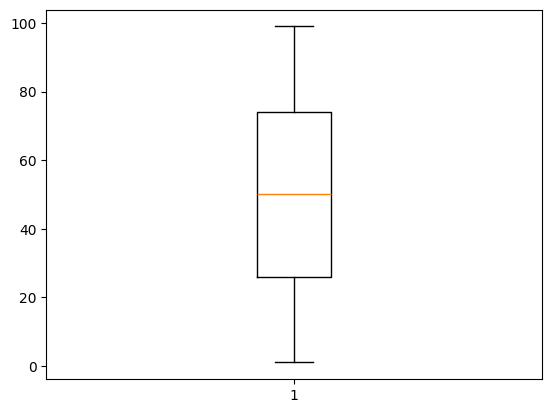

In [77]:
plt.boxplot(data['Population'])
print(data['Population'].mean())
print(data['Population'].max())
print(data['Population'].min())

<Axes: >

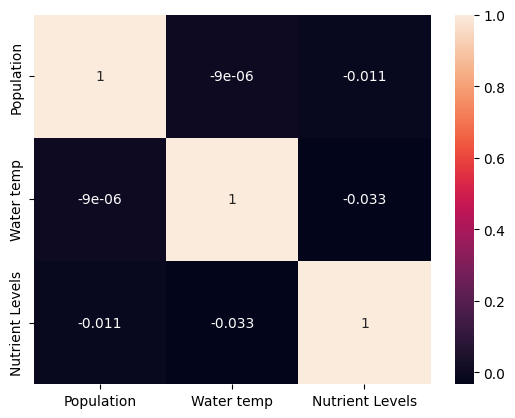

In [78]:
corr = data.corr(numeric_only= True)
sb.heatmap(corr,annot=True)

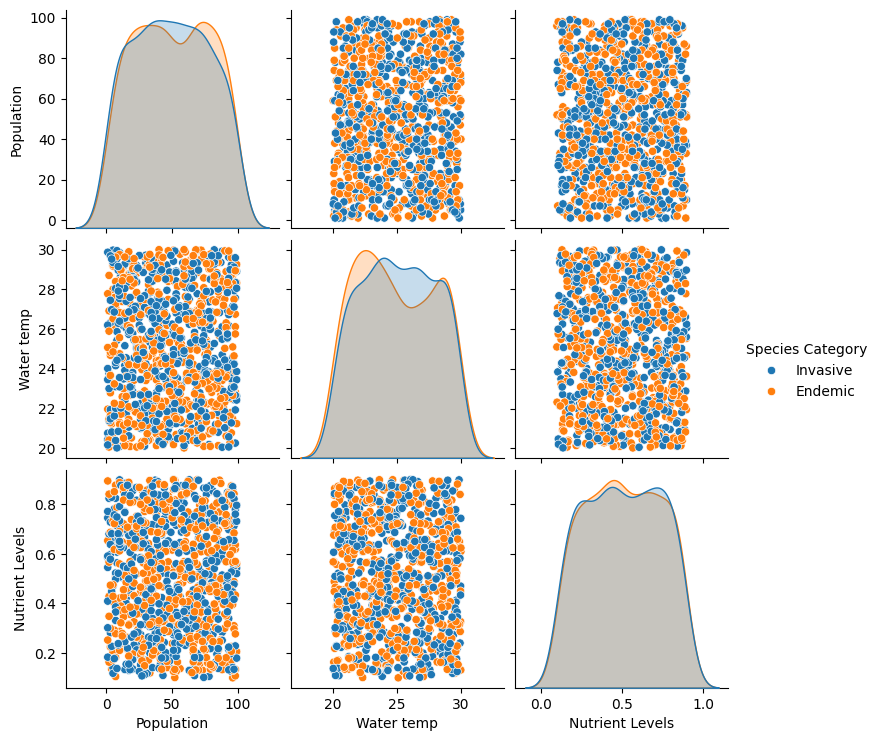

In [79]:
sb.pairplot(data, hue="Species Category")

In [80]:
data["Species"].value_counts()

Species
Jellyfish    277
Crab         249
Fish         239
Coral        235
Name: count, dtype: int64

In [81]:
data["Species"].count()

1000

In [82]:
data.groupby(["Species"])

1. What is the distribution of species diversity and abundance across different regions of
the Coral Reef of Atlantis?

In [83]:
data["Region"].value_counts()

Region
Western Reef     257
Northern Reef    257
Eastern Reef     254
Southern Reef    232
Name: count, dtype: int64

In [84]:
data.groupby(['Region'])['Species'].value_counts()

Region         Species  
Eastern Reef   Jellyfish    73
               Coral        67
               Crab         63
               Fish         51
Northern Reef  Fish         73
               Jellyfish    73
               Coral        56
               Crab         55
Southern Reef  Jellyfish    69
               Crab         59
               Fish         53
               Coral        51
Western Reef   Crab         72
               Fish         62
               Jellyfish    62
               Coral        61
Name: count, dtype: int64

<Axes: xlabel='Region'>

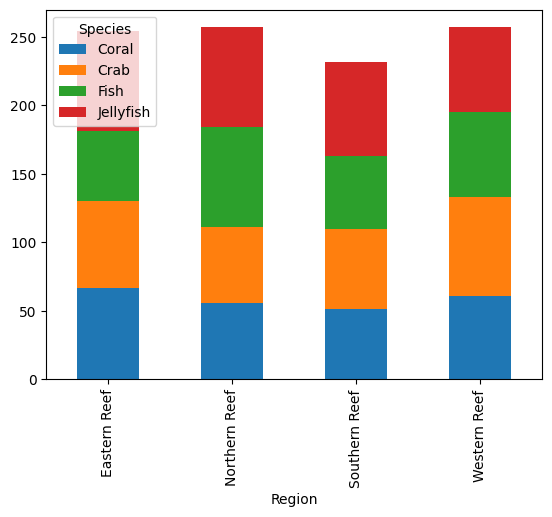

In [85]:
species_dist = data.groupby(['Region'])['Species'].value_counts()

species_dist.unstack().plot(kind='bar',stacked= True)

2. Are there any observable patterns or clusters in the dataset that distinguish between
endemic and invasive species?


In [86]:
# can be with groupby, but just use pairplot


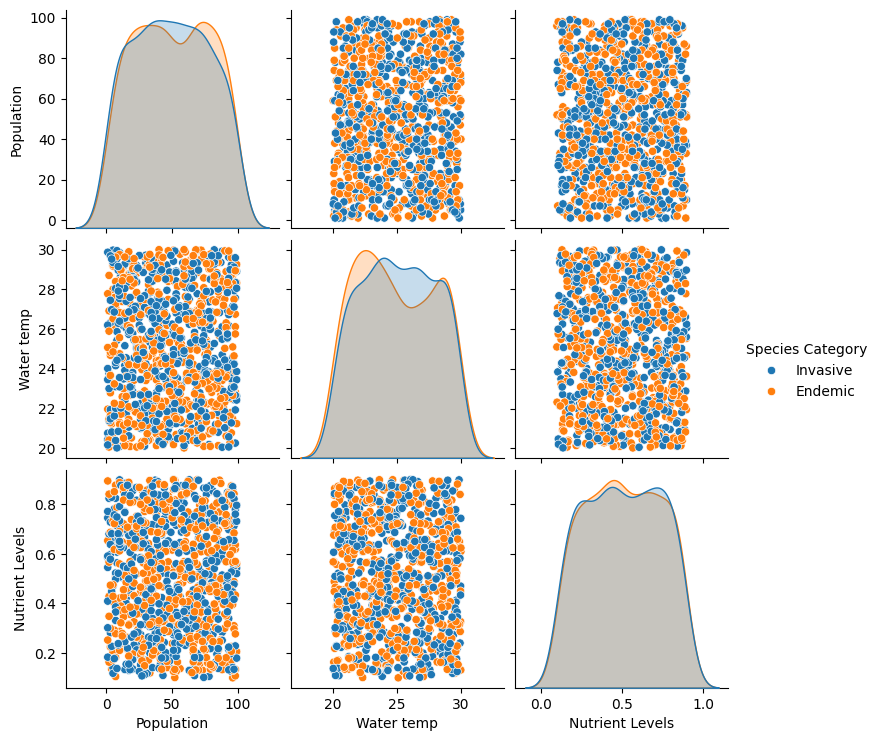

In [87]:
sb.pairplot(data, hue="Species Category")
# numerical

<Axes: xlabel='Species Category'>

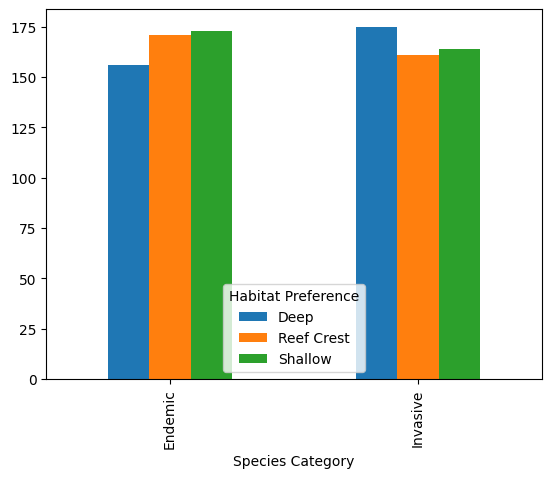

In [88]:
# for categorical, do group by for each manually
data.groupby('Species Category')['Habitat Preference'].value_counts().unstack().plot(kind='bar')

# do every single one
# like data.groupby('Species Category')['Behavior'].value_counts().unstack().plot(kind='bar')
# untill all is done


In [89]:
data.head()

,Region,Species,Population,Species Category,Behavior,Habitat Preference,Trophic Level,Water temp,Nutrient Levels
0,Western Reef,Fish,33,Invasive,Solitary,Shallow,Herbivore,25.334903,0.306537
1,Southern Reef,Crab,15,Invasive,Solitary,Deep,Carnivore,21.734394,0.421331
2,Eastern Reef,Jellyfish,8,Invasive,Schooling,Deep,Carnivore,25.429249,0.713816
3,Eastern Reef,Crab,78,Invasive,Schooling,Deep,Carnivore,27.366580,0.343183
4,Western Reef,Fish,61,Endemic,Schooling,Deep,Herbivore,23.642494,0.349990


3. How do environmental factors like water temperature and nutrient levels vary across
different regions of the reef?

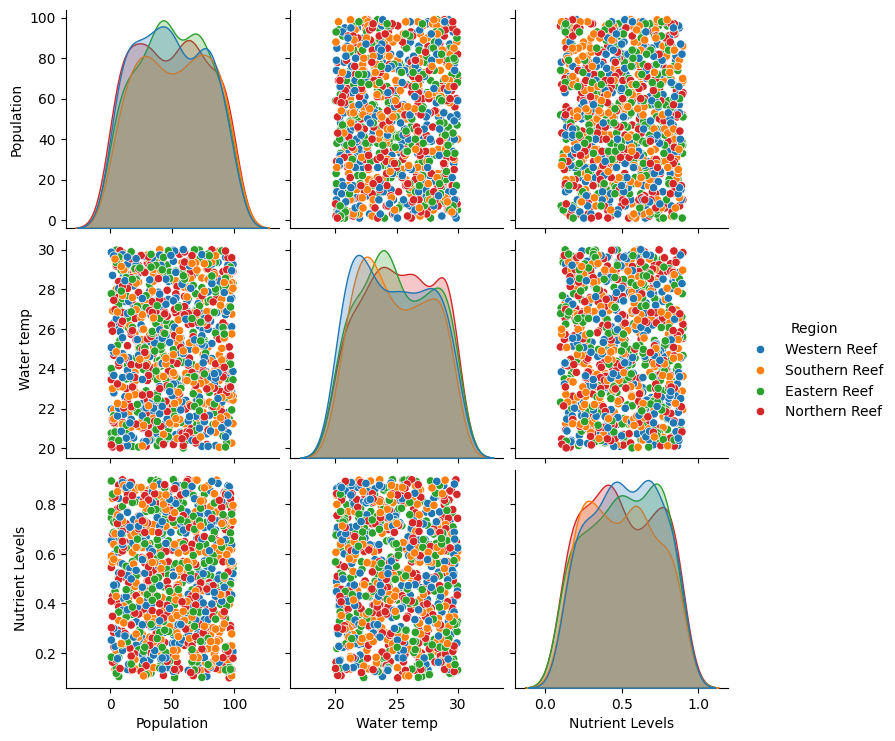

In [90]:
sb.pairplot(data,hue="Region")

In [91]:
# data = data[data['Population'] > 50]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Region              1000 non-null   object 
 1   Species             1000 non-null   object 
 2   Population          1000 non-null   int64  
 3   Species Category    1000 non-null   object 
 4   Behavior            1000 non-null   object 
 5   Habitat Preference  1000 non-null   object 
 6   Trophic Level       1000 non-null   object 
 7   Water temp          1000 non-null   float64
 8   Nutrient Levels     1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


<Axes: >

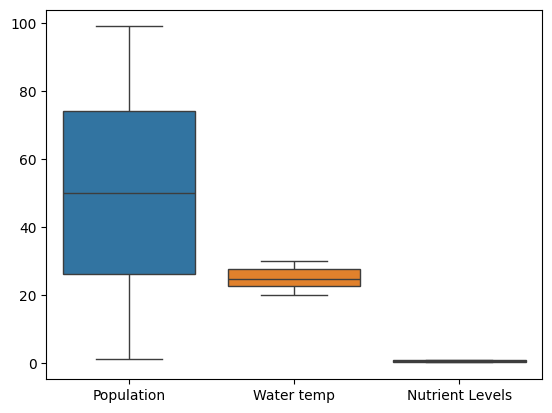

In [92]:
sb.boxplot(data)

In [93]:
data['Population'].value_counts()

Population
40    20
26    19
10    19
69    18
51    15
      ..
12     5
22     5
9      5
89     5
24     4
Name: count, Length: 99, dtype: int64

(array([52., 53., 42., 53., 40., 61., 56., 52., 54., 33., 59., 43., 50.,
        57., 53., 52., 46., 43., 43., 58.]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ,
        54.9, 59.8, 64.7, 69.6, 74.5, 79.4, 84.3, 89.2, 94.1, 99. ]),
 <BarContainer object of 20 artists>)

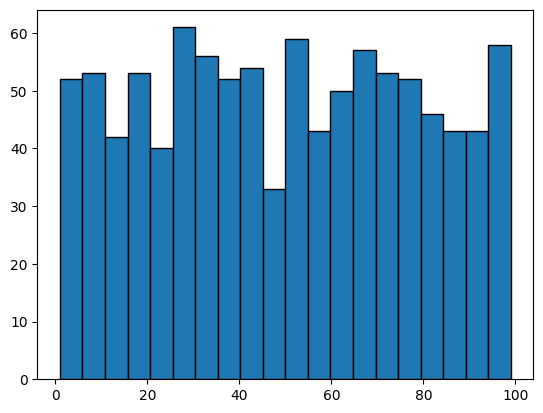

In [94]:
plt.hist(data['Population'],bins=20,ec='black')

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Region              1000 non-null   object 
 1   Species             1000 non-null   object 
 2   Population          1000 non-null   int64  
 3   Species Category    1000 non-null   object 
 4   Behavior            1000 non-null   object 
 5   Habitat Preference  1000 non-null   object 
 6   Trophic Level       1000 non-null   object 
 7   Water temp          1000 non-null   float64
 8   Nutrient Levels     1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


In [96]:
data['Species'].unique()

array(['Fish', 'Crab', 'Jellyfish', 'Coral'], dtype=object)

In [97]:
data[data['Population']> 60]

,Region,Species,Population,Species Category,Behavior,Habitat Preference,Trophic Level,Water temp,Nutrient Levels
3,Eastern Reef,Crab,78,Invasive,Schooling,Deep,Carnivore,27.366580,0.343183
4,Western Reef,Fish,61,Endemic,Schooling,Deep,Herbivore,23.642494,0.349990
6,Southern Reef,Coral,73,Endemic,Solitary,Shallow,Omnivore,27.302908,0.130771
7,Southern Reef,Coral,74,Endemic,Aggressive,Reef Crest,Omnivore,28.570298,0.291961
10,Southern Reef,Jellyfish,80,Invasive,Solitary,Deep,Omnivore,26.856132,0.740064
...,...,...,...,...,...,...,...,...,...
991,Eastern Reef,Coral,82,Endemic,Schooling,Reef Crest,Omnivore,28.668336,0.662092
992,Western Reef,Jellyfish,95,Invasive,Solitary,Reef Crest,Herbivore,21.276757,0.837354
993,Southern Reef,Jellyfish,73,Endemic,Solitary,Reef Crest,Herbivore,20.569970,0.712720
996,Western Reef,Crab,92,Invasive,Aggressive,Shallow,Omnivore,27.834154,0.465264


In [98]:
# data.drop(['Population'],axis=1)


In [99]:
data.drop('Population',axis=1)

,Region,Species,Species Category,Behavior,Habitat Preference,Trophic Level,Water temp,Nutrient Levels
0,Western Reef,Fish,Invasive,Solitary,Shallow,Herbivore,25.334903,0.306537
1,Southern Reef,Crab,Invasive,Solitary,Deep,Carnivore,21.734394,0.421331
2,Eastern Reef,Jellyfish,Invasive,Schooling,Deep,Carnivore,25.429249,0.713816
3,Eastern Reef,Crab,Invasive,Schooling,Deep,Carnivore,27.366580,0.343183
4,Western Reef,Fish,Endemic,Schooling,Deep,Herbivore,23.642494,0.349990
...,...,...,...,...,...,...,...,...
995,Southern Reef,Coral,Invasive,Schooling,Reef Crest,Carnivore,29.149126,0.238202
996,Western Reef,Crab,Invasive,Aggressive,Shallow,Omnivore,27.834154,0.465264
997,Eastern Reef,Crab,Endemic,Solitary,Deep,Omnivore,26.526336,0.213774
998,Northern Reef,Coral,Invasive,Aggressive,Deep,Omnivore,24.824243,0.686595


1.0


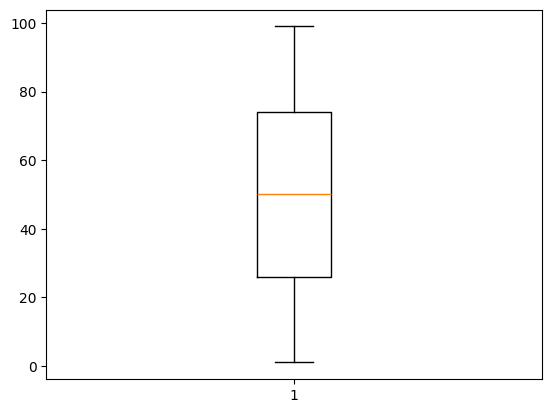

In [100]:
boxplot = plt.boxplot(data['Population'])

lower_bound = boxplot['whiskers'][0].get_ydata()[1]
upper_bound= boxplot['whiskers'][1].get_ydata()[1]

print(lower_bound)

filtered_data = data[(data['Population']>50)]

{'whiskers': [<matplotlib.lines.Line2D at 0x2a49de932c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a49de938f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a49de930b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a49de93dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a49dec4140>],
 'means': []}

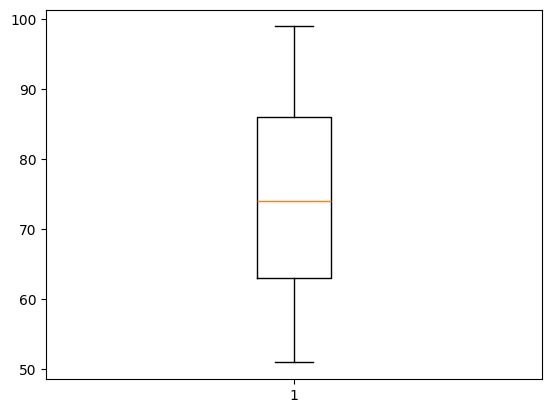

In [101]:
plt.boxplot(filtered_data['Population'])

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Region              1000 non-null   object 
 1   Species             1000 non-null   object 
 2   Population          1000 non-null   int64  
 3   Species Category    1000 non-null   object 
 4   Behavior            1000 non-null   object 
 5   Habitat Preference  1000 non-null   object 
 6   Trophic Level       1000 non-null   object 
 7   Water temp          1000 non-null   float64
 8   Nutrient Levels     1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


In [103]:
data['Trophic Level'].value_counts()

Trophic Level
Carnivore    340
Herbivore    333
Omnivore     327
Name: count, dtype: int64

In [104]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

labeler = LabelEncoder()
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output= False).set_output(transform='pandas')
features = ohe.fit_transform(data[["Region"]])
data =  pd.concat([data,features],axis=1).drop(["Region"],axis=1)

In [105]:
features = ohe.fit_transform(data[["Species"]])
data = pd.concat([data,features],axis=1).drop(["Species"],axis=1)

In [106]:
data['Species Category']=labeler.fit_transform(data['Species Category'])

In [107]:
data['Behavior']=labeler.fit_transform(data['Behavior'])

In [108]:
features = ohe.fit_transform(data[['Habitat Preference']])
data = pd.concat([data,features],axis=1).drop(["Habitat Preference"],axis=1)

In [109]:
features = ohe.fit_transform(data[['Trophic Level']])
data = pd.concat([data,features],axis=1).drop(["Trophic Level"],axis=1)

In [110]:
data.head()

,Population,Species Category,Behavior,Water temp,Nutrient Levels,Region_Eastern Reef,Region_Northern Reef,Region_Southern Reef,Region_Western Reef,Species_Coral,Species_Crab,Species_Fish,Species_Jellyfish,Habitat Preference_Deep,Habitat Preference_Reef Crest,Habitat Preference_Shallow,Trophic Level_Carnivore,Trophic Level_Herbivore,Trophic Level_Omnivore
0,33,1,2,25.334903,0.306537,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,15,1,2,21.734394,0.421331,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,8,1,1,25.429249,0.713816,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,78,1,1,27.366580,0.343183,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,61,0,1,23.642494,0.349990,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Population                     1000 non-null   int64  
 1   Species Category               1000 non-null   int32  
 2   Behavior                       1000 non-null   int32  
 3   Water temp                     1000 non-null   float64
 4   Nutrient Levels                1000 non-null   float64
 5   Region_Eastern Reef            1000 non-null   float64
 6   Region_Northern Reef           1000 non-null   float64
 7   Region_Southern Reef           1000 non-null   float64
 8   Region_Western Reef            1000 non-null   float64
 9   Species_Coral                  1000 non-null   float64
 10  Species_Crab                   1000 non-null   float64
 11  Species_Fish                   1000 non-null   float64
 12  Species_Jellyfish              1000 non-null   fl

In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['Water temp'] =  scaler.fit_transform(data[['Water temp']])

In [113]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data['Water temp'] =  scaler.fit_transform(data[['Water temp']])

In [114]:
data.head()

,Population,Species Category,Behavior,Water temp,Nutrient Levels,Region_Eastern Reef,Region_Northern Reef,Region_Southern Reef,Region_Western Reef,Species_Coral,Species_Crab,Species_Fish,Species_Jellyfish,Habitat Preference_Deep,Habitat Preference_Reef Crest,Habitat Preference_Shallow,Trophic Level_Carnivore,Trophic Level_Herbivore,Trophic Level_Omnivore
0,33,1,2,0.533072,0.306537,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,15,1,2,0.172124,0.421331,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,8,1,1,0.542530,0.713816,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,78,1,1,0.736745,0.343183,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,61,0,1,0.363409,0.349990,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


<Axes: >

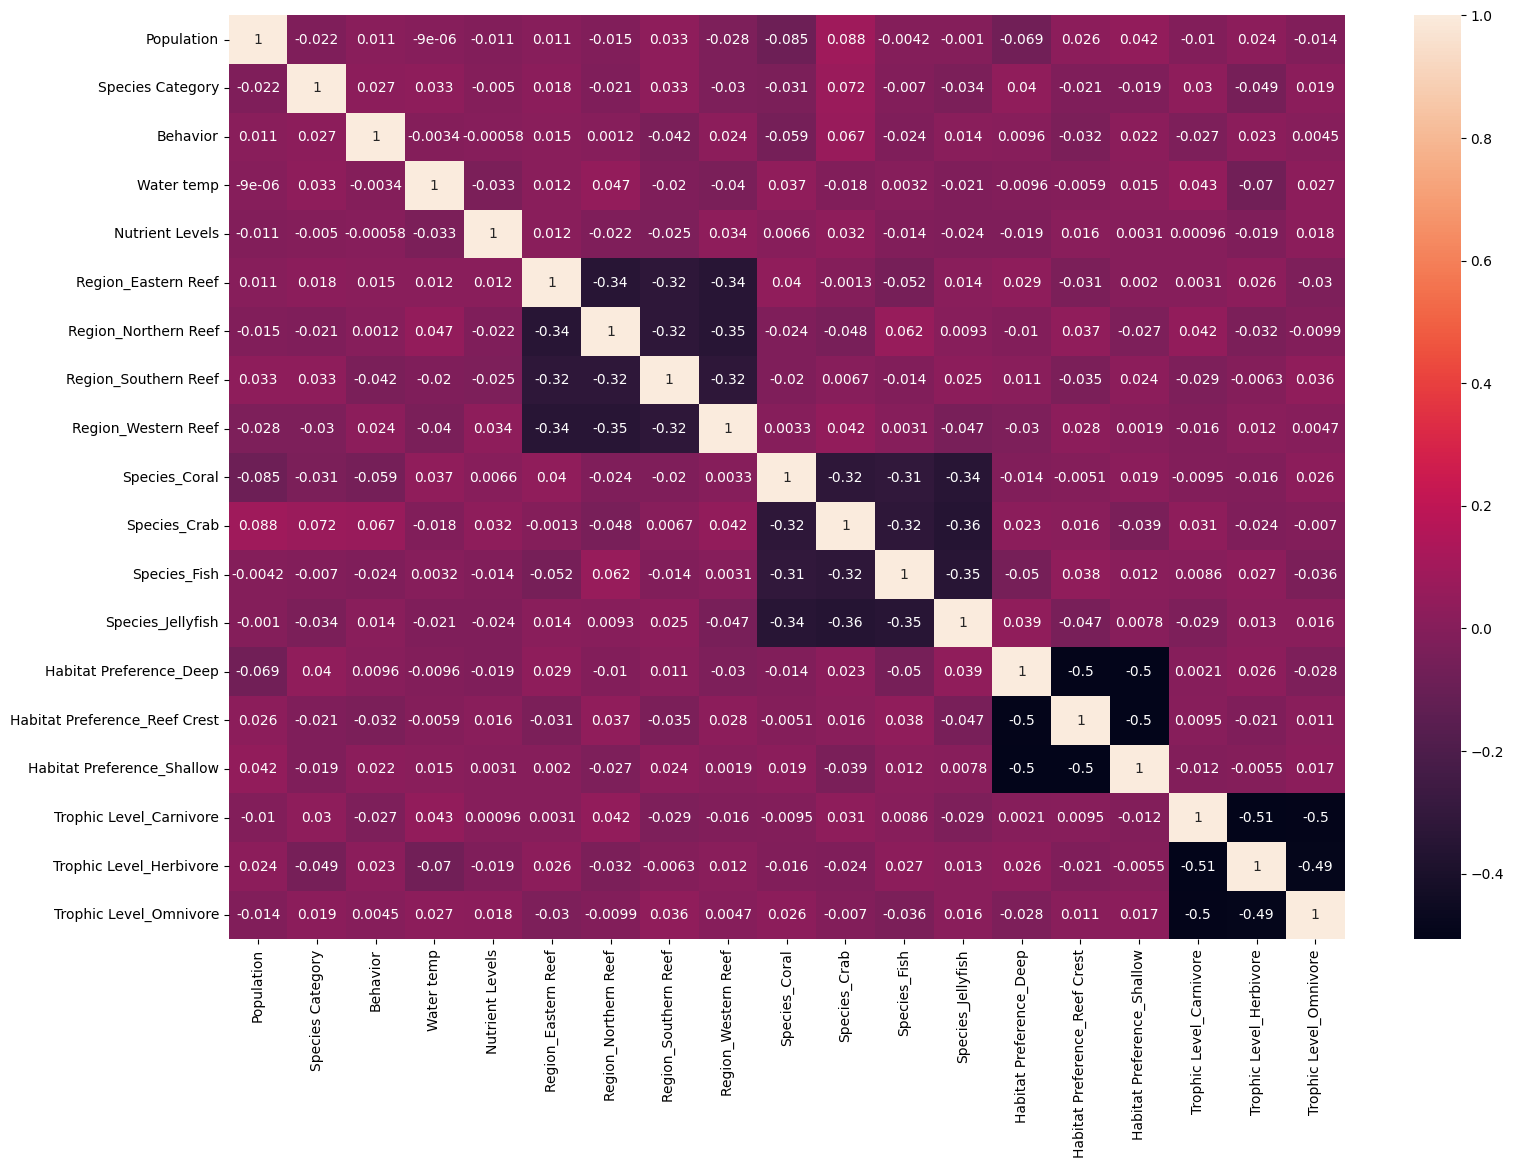

In [115]:
corr = data.corr()
plt.figure(figsize=(18, 12))
sb.heatmap(corr,annot=True)

In [116]:
from sklearn.model_selection import train_test_split
X = data[["Water temp","Species_Crab", "Species_Jellyfish", "Habitat Preference_Deep", "Trophic Level_Herbivore"]]

Y = data["Species Category"]

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.3, random_state = 42)

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Assuming you have defined XTrain, YTrain, XTest, and YTest

# These are all the possible values that we will try out.
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear', 'rbf'],
              }

model = SVC()
grid = GridSearchCV(model, param_grid) 

clf = grid.fit(XTrain, YTrain)

# Accessing the best_estimator_ attribute
best_estimator = clf.best_estimator_

print('Best', best_estimator)
print("Train set acc: ", best_estimator.score(XTrain, YTrain))
print("Test set acc: ", best_estimator.score(XTest, YTest))


Best SVC(C=100, gamma='auto')
Train set acc:  0.5885714285714285
Test set acc:  0.4866666666666667


In [119]:
RFM = RandomForestClassifier(n_estimators=5,random_state=42,max_depth=20)
RFM.fit(XTrain,YTrain)
Ypredict = RFM.predict(XTest)

accuracy = metrics.accuracy_score(YTest,Ypredict)
print(accuracy)

0.5166666666666667


In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Assuming you have defined XTrain, YTrain, XTest, and YTest

# These are all the possible values that we will try out.
param_grid = {'n_estimators': [50, 100, 200],  
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2],
              'bootstrap': [True]
              }


model = RandomForestClassifier()
grid = GridSearchCV(model, param_grid) 

clf = grid.fit(XTrain, YTrain)

# Accessing the best_estimator_ attribute
best_estimator = clf.best_estimator_

print('Best', best_estimator)
print("Train set acc: ", best_estimator.score(XTrain, YTrain))
print("Test set acc: ", best_estimator.score(XTest, YTest))


Best RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=50)
Train set acc:  0.89
Test set acc:  0.49


In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Assuming you have defined XTrain, YTrain, XTest, and YTest

# Define a simpler hyperparameter grid
param_grid = {'n_estimators': [100, 200],
              'max_depth': [None, 10],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2],
              'bootstrap': [True]
              }

# Create a Random Forest classifier
model = RandomForestClassifier()

# Perform Grid Search CV with the simplified parameter grid
grid = GridSearchCV(model, param_grid)

# Fit the grid search to the training data
clf = grid.fit(XTrain, YTrain)

# Access the best estimator
best_estimator = clf.best_estimator_

# Evaluate the best estimator on the training and test sets
print('Best', best_estimator)
print("Train set acc: ", best_estimator.score(XTrain, YTrain))
print("Test set acc: ", best_estimator.score(XTest, YTest))


Best RandomForestClassifier(min_samples_split=5)
Train set acc:  0.8971428571428571
Test set acc:  0.49333333333333335


In [122]:
best_par = clf.best_params_

# Evaluate the best estimator on the training and test sets
print('Best', best_par)

Best {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Population                     1000 non-null   int64  
 1   Species Category               1000 non-null   int32  
 2   Behavior                       1000 non-null   int32  
 3   Water temp                     1000 non-null   float64
 4   Nutrient Levels                1000 non-null   float64
 5   Region_Eastern Reef            1000 non-null   float64
 6   Region_Northern Reef           1000 non-null   float64
 7   Region_Southern Reef           1000 non-null   float64
 8   Region_Western Reef            1000 non-null   float64
 9   Species_Coral                  1000 non-null   float64
 10  Species_Crab                   1000 non-null   float64
 11  Species_Fish                   1000 non-null   float64
 12  Species_Jellyfish              1000 non-null   fl

In [124]:
all_cmaps = plt.colormaps()

# Print the list of colormaps
print(all_cmaps)

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

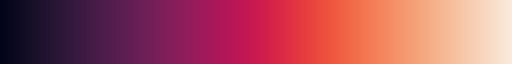

In [125]:
sb.color_palette("rocket", as_cmap=True)

In [126]:
from sklearn.metrics import classification_report

clf = RandomForestClassifier()
clf.fit(XTrain, YTrain)

y_pred = clf.predict(XTest)
train_y_pred = clf.predict(XTrain)
print(classification_report(YTrain, train_y_pred))
print(classification_report(YTest, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       354
           1       1.00      1.00      1.00       346

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

              precision    recall  f1-score   support

           0       0.49      0.52      0.50       146
           1       0.52      0.49      0.50       154

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300

